# Example Valuation: Morgan Stanley (MS Stock)

This analysis of Morgan Stanley stock (ticker MS) aims to assess whether to over or underweight the stock in a portfolio.

Morgan Stanley has paid dividends consistently over multiple decades. As such, the DDM (dividend discount model) can effectively model the value of Morgan Stanley's stock. If the DDM model returns a value that is lower than the current price of MS, then the stock is overvalued and would probably be rated underweight in a portfolio. If the model returns a value that is higher than the current price of MS, then the stock is undervalued and would probably be rated overweight in a portfolio.

I will also perform a comparative analysis of the financials sector (which Morgan Stanley belongs to) against the broader S&P500, and of Morgan Stanley stock versus the financial sector. This will reflect whether the financial sector as a whole is favorably priced, and if Morgan Stanley is fairly valued amongst financial stocks.

Finally, using the results of the DDM model and accounting for any positive or negative indicators in the comparative analysis, I will draw a conclusion on whether to over or underweight MS stock in a portfolio.

The AlphaVantage API is used for all data, unless otherwise stated.

## Initial Setup (Package Imports & API Configuration)

In [44]:
import requests
import json
import time
import matplotlib.pyplot as plt

api_key = "secret" 
master_stock = "MS"

# Helper functions to Make & Process API Calls for Commonly Used Data

def get_value(ticker, key, api_function, json_key_0, json_key_1=None):
    request_url = f"https://www.alphavantage.co/query?function={api_function}&symbol={ticker}&apikey={key}"
    r = requests.get(request_url)
    data = r.json()
    if (json_key_1 != None):
        return (data[json_key_0][json_key_1])
    else:
        return (data[json_key_0])

def get_price(ticker, key):
    return float(get_value(ticker, key, "GlOBAL_QUOTE", "Global Quote", "05. price"))

def get_pe_ratio(ticker, key):
    return float(get_value(ticker, key, "OVERVIEW", "PERatio"))

def get_peg_ratio(ticker, key):
    return float(get_value(ticker, key, "OVERVIEW", "PEGRatio"))

def get_dividend(ticker, key):
    return(float(get_value(ticker, key, "OVERVIEW", "DividendPerShare")))

## Financial Sector Comparative Analysis

### Methods

I will first compare the average PE (profit to earnings ratio) and PEG (profit to earnings to growth) ratio of the financial sector of the S&P500 to the PE and PEG ratios of the rest of the stocks in the index. 

The financial sector's PE & PEG, when compared to the average PE & PEG ratios of the rest of the index, will reflect whether financial stocks are over or undervalued in comparison to the broader market.

Comparing PE ratios will show how over/undervalued the financial sector is compared to the broader market at an absolute basis, while comparing the PEG ratios will reflect how over/undervalued the financial sector is when earnings growth is factored in.

To represent the financial sector, I will be using the ten largest financial stocks (by market cap and weight in the S&P500) in the index. 

To represent the broader index, I will be using the PE and PEG ratios of the S&P500. Calculating them locally would require more API requests than the key being used allows, and as such I have sourced this data from the following:

https://ycharts.com/indicators/sp_500_pe_ratio <br> 
https://www.gurufocus.com/economic_indicators/58/sp-500-earnings-per-share

I am using the given PE ratio for the S&P500 index, and dividing it by the 5 year average EPS growth rate for the index to calculate the PEG ratio.

### Execution

In [30]:
financial_tickers = ["SPGI", "JPM", "V", "MA", "BAC", "WFC", "MS", "GS", "BLK", "AXP"]
financial_ticker_pe = []
financial_ticker_peg = []

index_pe = 23.46
index_eps_growth = 8.69
index_peg = index_pe / index_eps_growth

for ticker in financial_tickers:
    temp_peg = get_peg_ratio(ticker, api_key)
    financial_ticker_peg.append(temp_peg)
    print(f"{ticker}: successful, PEG: {temp_peg}")
    # Prevent API Blocking
    time.sleep(8)
financial_avg_peg = sum(financial_ticker_peg) / len (financial_ticker_peg)

for ticker in financial_tickers:
    temp_pe = get_pe_ratio(ticker, api_key)
    financial_ticker_pe.append(temp_pe)
    print(f"{ticker}: successful, PE: {temp_pe}")
    # Prevent API Blocking
    time.sleep(8)
financial_avg_pe = sum(financial_ticker_pe) / len (financial_ticker_pe)

print(f"Financial ticker PE Ratios: {financial_ticker_pe}")
print(f"Financial ticker PEG Ratios: {financial_ticker_peg}")


SPGI: successful, PEG: 4.763
JPM: successful, PEG: 1.166
V: successful, PEG: 1.628
MA: successful, PEG: 1.334
BAC: successful, PEG: 87.48
WFC: successful, PEG: 0.17
MS: successful, PEG: 49.29
GS: successful, PEG: 1.253
BLK: successful, PEG: 13.91
AXP: successful, PEG: 1.15
SPGI: successful, PE: 55.8
JPM: successful, PE: 9.6
V: successful, PE: 30.65
MA: successful, PE: 38.74
BAC: successful, PE: 8.39
WFC: successful, PE: 10.87
MS: successful, PE: 15.65
GS: successful, PE: 14.65
BLK: successful, PE: 20.47
AXP: successful, PE: 16.46
Financial ticker PE Ratios: [55.8, 9.6, 30.65, 38.74, 8.39, 10.87, 15.65, 14.65, 20.47, 16.46]
Financial ticker PEG Ratios: [4.763, 1.166, 1.628, 1.334, 87.48, 0.17, 49.29, 1.253, 13.91, 1.15]


Some of the values provided by the API for PEG ratios are outliers (87.48, 49.29, etc) and are likely not representative of the true PEG of the stocks. I suspect this is because the formula used by the API uses growth rate that is not representative of the true growth rate of the stock's earnings in the long run. As a result, I have chosen to manually substitute the PEG values used in this analysis with those provided by NASDAQ (https://www.nasdaq.com/). This discrepency highlights how highly speculative growth estimates make ratios which use growth rates, such as PEG, somewhat unreliable. However, I will still be including it in the evaluation for reference.

In [35]:
# Manually setting financial ticker PEG ratios
financial_ticker_peg = [2.47, 1.92, 1.82, 1.86, 1.22, 0.87, 2.44, 1.35, 1.98, 1.02]
financial_avg_peg = sum(financial_ticker_peg) / len (financial_ticker_peg)

In [28]:
# Display Results
print(f"Financial Sector PE: {round(financial_avg_pe, 3)}")
print(f"Index Average PE: {round(index_pe, 3)}")

print(f"Financial Sector PEG: {round(financial_avg_peg, 3)}")
print(f"Index Average PEG: {round(index_peg, 3)}")

Financial Sector PE: 22.128
Index Average PE: 23.46
Financial Sector PEG: 1.695
Index Average PEG: 2.7


### Results
The results show that the financial sector has a 6% lower P/E ratio on average when compared to the S&P500 Index. This difference, although small, indicates that the financial sector is valued favorably compared to the index as a whole, which supports overweighting financial stocks at  current prices. 

The results show that the financial sector has a significantly lower PEG ratio (by over 60%) than the S&P500 Index. This implies that the financial sector overall is priced very favorably from a growth perspective, as it offers significantly lower prices for future earnings growth than other stocks in the S&P500. 

Overall, this comparative analysis supports __overweighting__ the financial sector versus the broader S&P500. It offers a slightly more favorable PE ratio, and significantly lower PEG ratio, indicating lower prices for earnings and growth rates versus the S&P500 index. 

## MS Comparative Valuation
### Methods

I will now compare the PE and PEG ratios of MS stock to the average PE and PEG ratios of the overall financial sector, which will reflect how over/undervalued MS stock is when compared to other stocks in the same sector.

Because other financial stocks will respond similarly to broader economic conditions, this analysis will provide insight into the company's intrinsic valuation, exclusive of factors which impact the industry as a whole.

To maintain consistency with the earlier PEG analysis, I will be using NASDAQ's PEG ratio for MS stock.

### Execution

In [36]:
# Note: Financial sector PE/PEG stored from earlier calculations
ms_pe = get_pe_ratio(master_stock, api_key)
ms_peg = 2.44

# Display Results
print(f"Financial Sector PE: {round(financial_avg_pe, 2)}")
print(f"Morgan Stanley Average PE: {ms_pe}")

print(f"Financial Sector PEG: {round(financial_avg_peg, 2)}")
print(f"Morgan Stanley Average PEG: {ms_peg}")

Financial Sector PE: 22.13
Morgan Stanley Average PE: 15.65
Financial Sector PEG: 1.69
Morgan Stanley Average PEG: 2.44


### Results
Morgan Stanley's PE ratio is significantly (over 40%) lower than the financial sector's average. This indicates that it produces more earnings for its price than most other financial companies. Thus, this analysis supports overweighting the stock in a portfolio. Morgan Stanley's PEG is noticeably higher than the financial sector's average. However as seen previously, the PEG ratio varies hugely depending on the assumptions made for growth rate, and thus I will not be using this is a significant underweight factor.

The stock's current price supports overweighting if maximizing price to earnings ratio is the objective, and underweighting if maximizing price to earnings growth ratio is the objective (although, the accuracy of the PEG ratio is questionable). Because of this conflict, the comparative analysis of Morgan Stanley's stock is __inconclusive__, and supports neither over or underweighting the stock overall. 

## Morgan Stanley Absolute Valuation

### Methods

I will now determine the valuation of MS stock through the dividend discount model (DDM). Morgan Stanley has consistently distributed dividends to shareholders, this model will value the company based on these dividends.

The formula for the DDM model is as follows: 

Price = Div / (r - g); Where Div = next year's estimated dividend, r = cost of capital equity, and g = dividend growth rate.

The DDM formula being used (Gordon Growth Model) assumes a constant rate of dividend growth. I will be assuming a 4% annual rate of dividend increase, historical divident growth of the S&P500 is 3-5%.

To calculate r, the cost of capital equity, I will use the following formula:

r = {E / (E + D) * Cost of Equity} + {D / (E + D) * Cost of Debt * (1 - Tax Rate)}

Where:
E = Market Cap
D = Debt Value
Cost of Equity = Short & Long Term Debt & Capital Lease obligation
Cost of Debt = Interest Expense / D
Tax Rate = Corporate Tax Rate

Data for DDM evaluation has been sourced from from:<br>
https://www.wsj.com/market-data/quotes/MS/financials/annual/income-statement <br>
https://taxfoundation.org/data/all/state/combined-federal-state-corporate-tax-rates-2022/ <br>
https://www.koyfin.com/company/ms/dividends/<br>
https://www.gurufocus.com/term/wacc/MS/WACC-Percentage/MS




### Execution

In [42]:
# Calculating g, r & div
g = 0.04
div = 3.4 * (g + 1)

# Calculating r/capital equity cost (in millions of dollars)
E = 147586
D = 244692
cost_of_equity = 0.1184
cost_of_debt = 12268 / D
tax_rate = 0.21

r = (E / (E + D) * cost_of_equity) + (D / (E + D) * cost_of_debt * (1 - tax_rate))

# Calculating DDM
ddm_estimate = div / (r - g)

print(f"The DDM model Prices Morgan Stanley stock at: {round(ddm_estimate, 2)}")

The DDM model Prices Morgan Stanley stock at: 120.88


### Results

The DDM model produces a valuation of 120.88 USD for Morgan Stanley stock, and MS stock currently trades at 88.56 USD, implying that Morgan Stanley stock is undervalued by 36%. This valuation categorizes the stock as a good buy, as its current price is well below the stock's estimated value, which supports __overweighting__ Morgan Stanley stock in a portfolio. This model is likely the most representative of Morgan Stanley's fair value, as Morgan Stanley has paid substantial dividends for decades, making it an excellent candidate for DDM valuation.

## Conclusions
### Graphing

I will now plot the results of the comparative analyses performed earlier.

<function matplotlib.pyplot.show(close=None, block=None)>

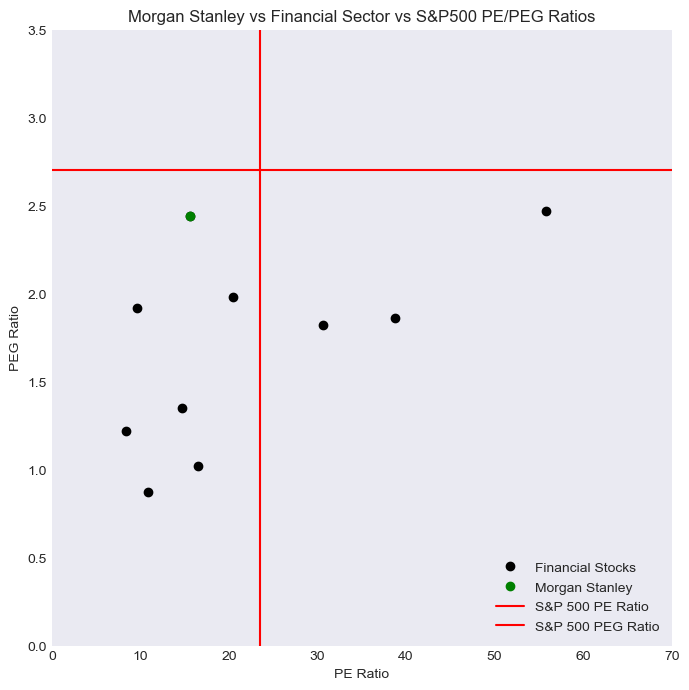

In [75]:
## PE & PEG (MS vs financial stocks vs S&P500 average) ##

# Styling
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(8,8))
plt.axis([0, 70, 0, 3.5])

# Plot Financial Stock (PE, PEG) in black
plt.plot(financial_ticker_pe, financial_ticker_peg, 'o', color = 'black', label = 'Financial Stocks')

# Plot Morgan Stanley (PE, PEG) in green
plt.plot(ms_pe, ms_peg, 'o', color = 'green', label = "Morgan Stanley")

# Plot S&P500 Index PE vertical line and PEG horizontal line
plt.axvline(x = index_pe, color = 'red', label = 'S&P 500 PE Ratio')
plt.axhline(y = index_peg, color = 'red', label = 'S&P 500 PEG Ratio')

# Title and Axis Labels
plt.title("Morgan Stanley vs Financial Sector vs S&P500 PE/PEG Ratios")
plt.xlabel("PE Ratio")
plt.ylabel("PEG Ratio")

# Create Legend
plt.legend(loc="lower right")

# Display Graph
plt.show


As is evident in the graph, Morgan Stanley stock has a favorable PE and PEG ratio when compared to the S&P500. It also has favorable PE ratio in comparison to financial stocks. These factors strongly support overweighting the stock in a portfolio. In addition, the stock's DDM valuation is extremely favorable, as it prices the stock as undervalued by over 30% (with a current price of 88.56 USD and a valuation of 120.88 USD).

Morgan Stanley is involved in a variety of financial services, including market-making, investment banking, IPOs and mergers. Currently, the Federal Reserve has raised interest rates to highs not seen in over a decade, with no indication of rate cuts for the foreseeable future. Financial companies such as Morgan Stanley have historically benefitted from such high interest rates, as their banking revenue increases alongside interest rates

Although Morgan Stanley's stock has a high price to earnings to growth ratio amongst financial stocks, its growth is still priced reasonably compared to the S&P500. In addition, the PEG ratio is highly speculative, as the assumptions made when calculating growth rate can drastically impact this ratio. This was notably seen in the discrepencies between the external data source (NASDAQ) for PEG and the API's PEG values. For this reason, I will not be using this as a significant indication of the stock being undervalued. In addition, the PE ratio, which is based purely off of the most recent earnings and not speculation, places Morgan Stanley in the undervalued end of the financial sector, which supports the overweight ratings from the absolute analysis.

Because of Morgan Stanley's favorable valuation at an absolute basis and positioning to benefit from current economic conditions, I give Morgan Stanley stock an __Overweight__ rating.